In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from imblearn.over_sampling import KMeansSMOTE, SMOTE,SVMSMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.shape

(100000, 9)

In [7]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

**Exploratory Data Analysis and Visualisation**

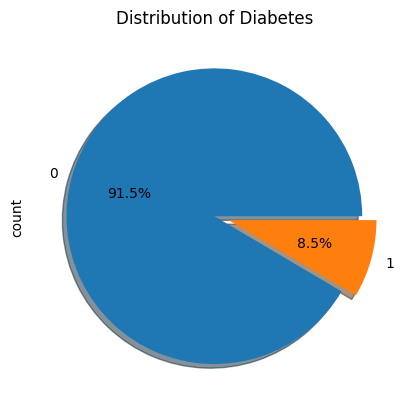

In [8]:
df.diabetes.value_counts().plot(kind = 'pie', autopct = '%1.1f%%',explode = [0, 0.1], shadow = True)
plt.title('Distribution of Diabetes')
plt.show()

We can see that only 8.5% of patients are diabetic.

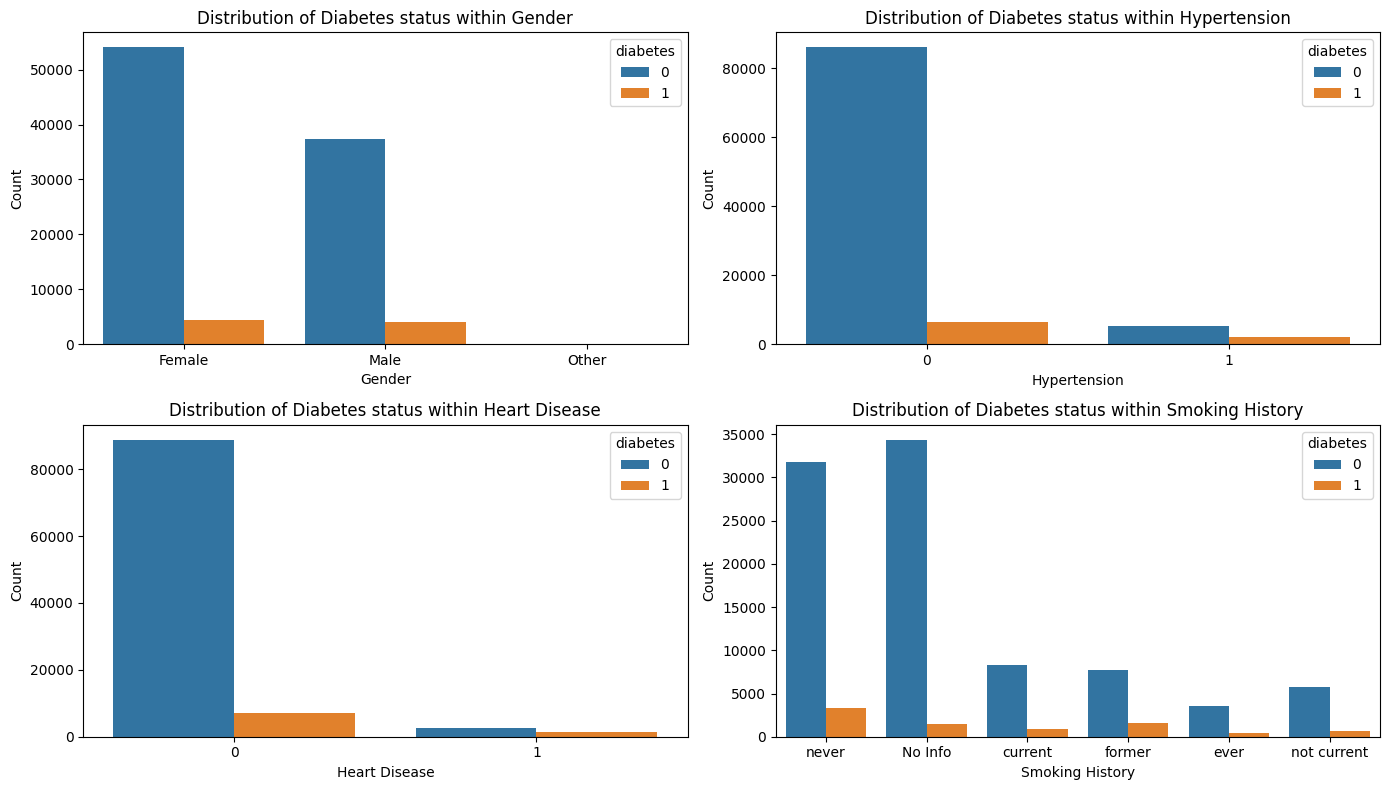

In [9]:
# ploting categorical features alongiside target feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Chart 1: Distribution of gender
sns.countplot(x="gender", data=df,hue = 'diabetes',ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Diabetes status within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# Chart 2: Distribution of a
sns.countplot(x="hypertension", data=df, hue = 'diabetes', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

# Chart 3: Distribution of heart disease
sns.countplot(x="heart_disease", hue = 'diabetes',data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Diabetes status within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")

# Chart 4: Distribution of smoking history
sns.countplot(x="smoking_history", data=df, hue = 'diabetes', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Diabetes status within Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

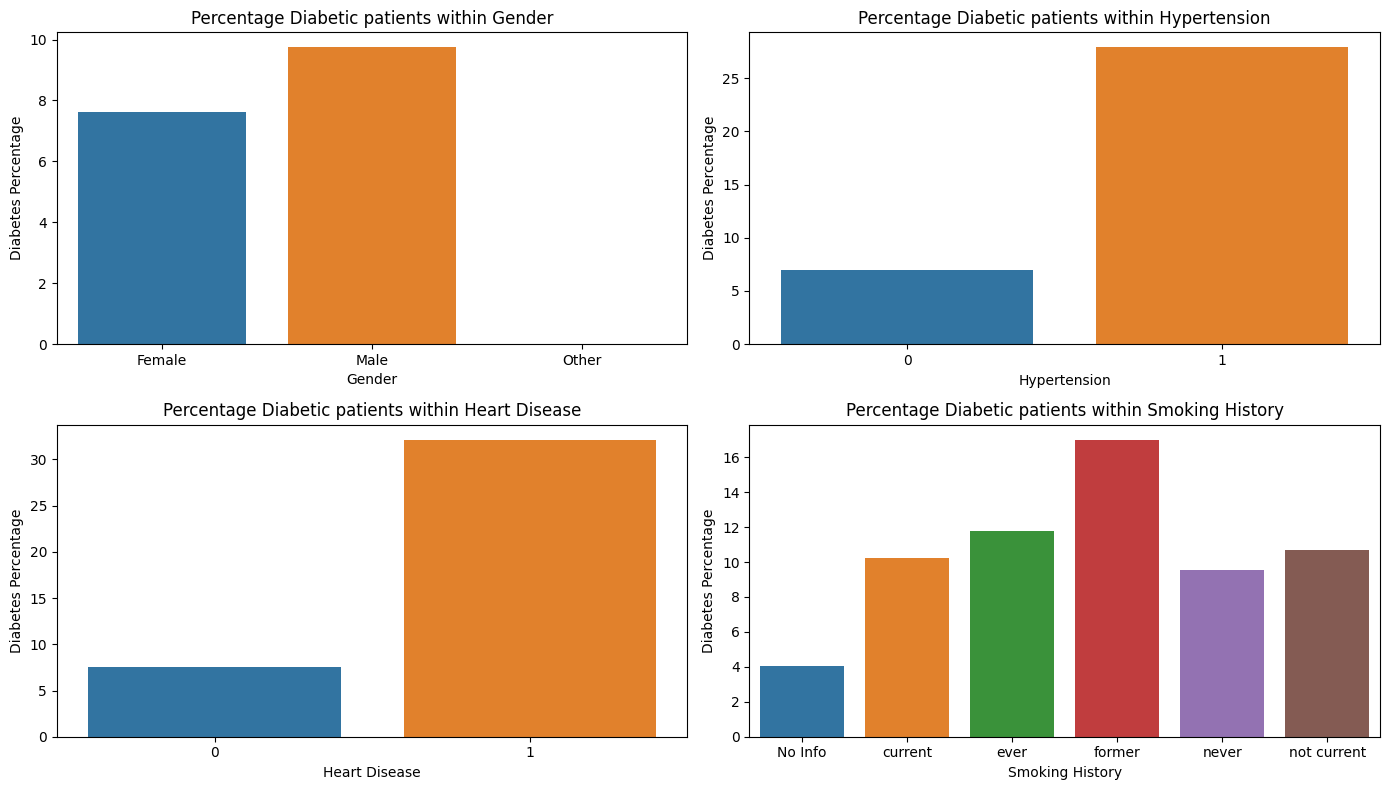

In [10]:
# Calculate the percentage of diabetes status within each category
gender_percentages = df.groupby('gender')['diabetes'].mean() * 100
hypertension_percentages = df.groupby('hypertension')['diabetes'].mean() * 100
heart_disease_percentages = df.groupby('heart_disease')['diabetes'].mean() * 100
smoking_history_percentages = df.groupby('smoking_history')['diabetes'].mean() * 100

# Plotting categorical features alongside target feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Chart 1: Distribution of gender
sns.barplot(x=gender_percentages.index, y=gender_percentages.values, ax=axes[0, 0])
axes[0, 0].set_title("Percentage Diabetic patients within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Diabetes Percentage")

# Chart 2: Distribution of hypertension
sns.barplot(x=hypertension_percentages.index, y=hypertension_percentages.values, ax=axes[0, 1])
axes[0, 1].set_title("Percentage Diabetic patients within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Diabetes Percentage")

# Chart 3: Distribution of heart disease
sns.barplot(x=heart_disease_percentages.index, y=heart_disease_percentages.values, ax=axes[1, 0])
axes[1, 0].set_title("Percentage Diabetic patients within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Diabetes Percentage")

# Chart 4: Distribution of smoking history
sns.barplot(x=smoking_history_percentages.index, y=smoking_history_percentages.values, ax=axes[1, 1])
axes[1, 1].set_title("Percentage Diabetic patients within Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Diabetes Percentage")

plt.tight_layout()
plt.show()

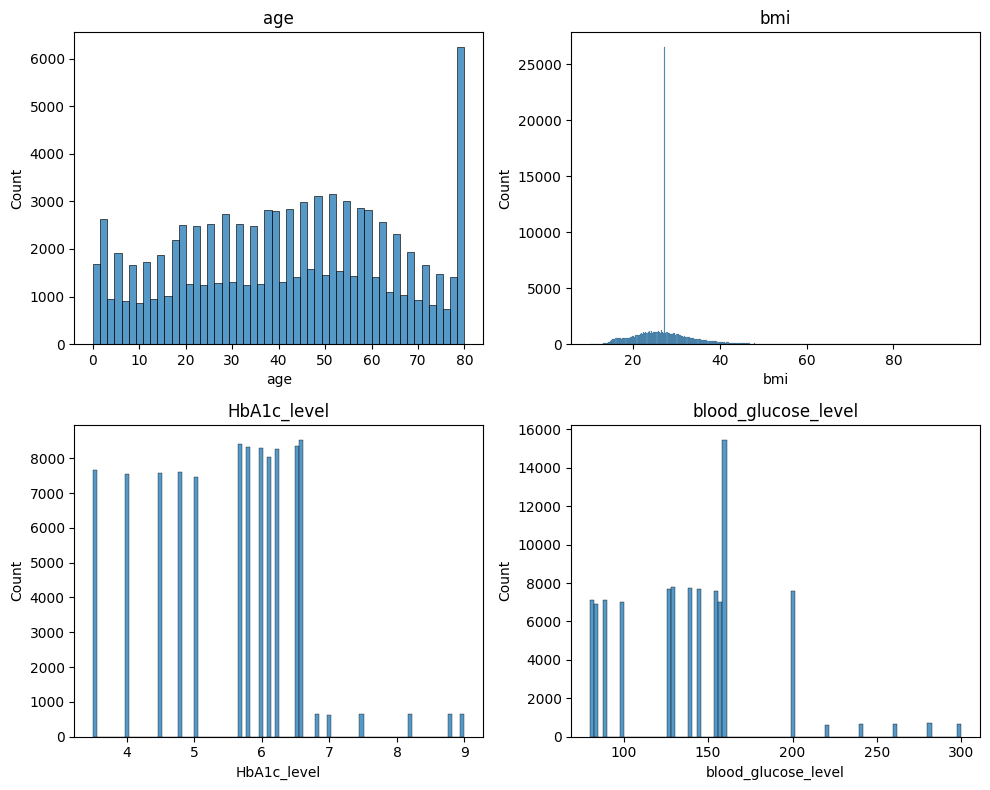

In [11]:
# Distribution of numeric features

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# List of numeric feature columns
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Loop through numeric features and plot them
for i, feature in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    
    sns.histplot(df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

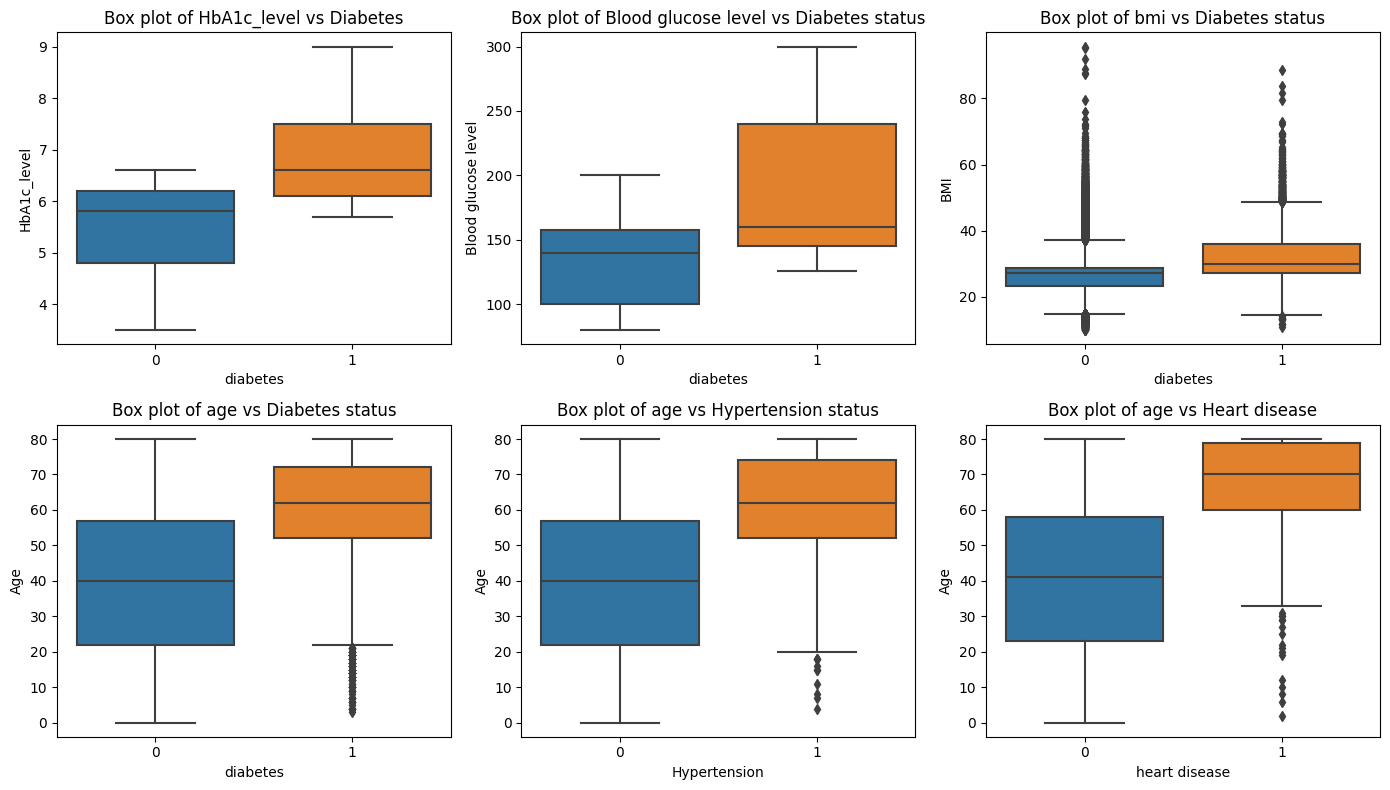

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# HbA1c_level vs Diabetes
sns.boxplot(x = 'diabetes', y = 'HbA1c_level', data = df,ax=axes[0, 0])
ax=axes[0, 0].set_title('Box plot of HbA1c_level vs Diabetes')
ax=axes[0, 0].set_xlabel('diabetes')
ax=axes[0, 0].set_ylabel('HbA1c_level')


# Blood glucose vs Diabetes
sns.boxplot(x = 'diabetes', y = 'blood_glucose_level', data = df,ax=axes[0, 1])
ax=axes[0, 1].set_title('Box plot of Blood glucose level vs Diabetes status')
ax=axes[0, 1].set_xlabel('diabetes')
ax=axes[0, 1].set_ylabel('Blood glucose level')


# BMI vs Diabetes
sns.boxplot(x = 'diabetes', y = 'bmi', data = df, ax=axes[0, 2])
ax=axes[0, 2].set_title('Box plot of bmi vs Diabetes status')
ax=axes[0, 2].set_xlabel('diabetes')
ax=axes[0, 2].set_ylabel('BMI')


# age vs Diabetes
sns.boxplot(x = 'diabetes', y = 'age', data = df, ax=axes[1, 0])
ax=axes[1, 0].set_title('Box plot of age vs Diabetes status')
ax=axes[1, 0].set_xlabel('diabetes')
ax=axes[1, 0].set_ylabel('Age')


# age vs hypertension
sns.boxplot(x = 'hypertension', y = 'age', data = df, ax=axes[1, 1])
ax=axes[1, 1].set_title('Box plot of age vs Hypertension status')
ax=axes[1, 1].set_xlabel('Hypertension')
ax=axes[1, 1].set_ylabel('Age')


# age vs heart disease
sns.boxplot(x = 'heart_disease', y = 'age', data = df, ax=axes[1, 2])
ax=axes[1, 2].set_title('Box plot of age vs Heart disease')
ax=axes[1, 2].set_xlabel('heart disease')
ax=axes[1, 2].set_ylabel('Age')

plt.tight_layout()
plt.show()

1. We can see that Diabetes is more common in people with high HbA1c level and Blood glucose level.
2. We can notice that excluding outliers, the youngest age frame for patients with hypertension and diabetes is 20 years, which means that patients aged 20 and above are more prone diabetes and hypertension.
3. Older people are more prone to heart disease.

In [13]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**DATA PREPROCESSING**

In [14]:
# Remove the 'other' from the gender column
df = df[df['gender']!='Other']
df.gender.value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [15]:
df.duplicated().sum()

3854

There are 3854 duplicated entries, so we need to remove them.

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'])
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,True,False,False,False,False


In [18]:
df_encoded.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [19]:
columns = ['gender_Female', 'gender_Male',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current']
df_encoded[columns] = df_encoded[columns].astype(int)

In [20]:
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


In [21]:
# Lets scale the numeric features

columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
df_encoded[columns] = scaler.fit_transform(df_encoded[columns])
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.700709,0,1,-0.314941,0.994547,0.043558,0,1,0,0,0,0,0,1,0
1,0.543261,0,0,-0.000214,0.994547,-1.423041,0,1,0,1,0,0,0,0,0
2,-0.614187,0,0,-0.000214,0.155949,0.483538,0,0,1,0,0,0,0,1,0
3,-0.258049,0,0,-0.572042,-0.496294,0.410208,0,1,0,0,1,0,0,0,0
4,1.522640,1,1,-1.061124,-0.682649,0.410208,0,0,1,0,1,0,0,0,0


**MODELLING**

In [22]:
X = df_encoded.drop('diabetes', axis = 1)
y = df_encoded.diabetes

In [23]:
#split the X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67289, 14), (67289,), (28839, 14), (28839,))

In [24]:
y_test.value_counts()

diabetes
0    26266
1     2573
Name: count, dtype: int64

We have an issue of class imbalance, we will have to balance the dataset before fitting the model.

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_train_resampled, y_train_resampled =smote.fit_resample(X_train, y_train)

In [26]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Iterate through classifiers, fit, and evaluate them
for name, classifier in classifiers:
    classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    
    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{report}")
    
    # Display confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{confusion}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     26266
           1       0.43      0.88      0.57      2573

    accuracy                           0.88     28839
   macro avg       0.71      0.88      0.75     28839
weighted avg       0.94      0.88      0.90     28839

Confusion Matrix:
[[23217  3049]
 [  319  2254]]
Model: Decision Tree
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     26266
           1       0.66      0.74      0.70      2573

    accuracy                           0.94     28839
   macro avg       0.82      0.85      0.83     28839
weighted avg       0.95      0.94      0.94     28839

Confusion Matrix:
[[25298   968]
 [  678  1895]]
Model: Random Forest
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

          

Lets try another variant of SMOTE which is SMOTENC

In [27]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [28]:
from imblearn.over_sampling import SMOTENC
categorical_features = [1,2,6,7,8,9,10,11,12,13]
smote_nc = SMOTENC(categorical_features = categorical_features,random_state = 42)
X_train_resampled, y_train_resampled =smote_nc.fit_resample(X_train, y_train)

In [29]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Iterate through classifiers, fit, and evaluate them
for name, classifier in classifiers:
    classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    
    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{report}")
    
    # Display confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{confusion}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     26266
           1       0.42      0.87      0.57      2573

    accuracy                           0.88     28839
   macro avg       0.70      0.88      0.75     28839
weighted avg       0.94      0.88      0.90     28839

Confusion Matrix:
[[23191  3075]
 [  323  2250]]
Model: Decision Tree
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26266
           1       0.68      0.74      0.71      2573

    accuracy                           0.95     28839
   macro avg       0.83      0.85      0.84     28839
weighted avg       0.95      0.95      0.95     28839

Confusion Matrix:
[[25360   906]
 [  678  1895]]
Model: Random Forest
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

          

In [30]:
y_train_resampled.value_counts()

diabetes
0    61380
1    61380
Name: count, dtype: int64

**ARTIFICIAL NEURAL NETWORK**

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
model = keras.Sequential([
    keras.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
2103/2103 [==============================] - 7s 3ms/step - loss: 0.1068 - accuracy: 0.9635 - val_loss: 0.0945 - val_accuracy: 0.9655
Epoch 2/10
2103/2103 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9693 - val_loss: 0.0917 - val_accuracy: 0.9676
Epoch 3/10
2103/2103 [==============================] - 8s 4ms/step - loss: 0.0856 - accuracy: 0.9704 - val_loss: 0.0896 - val_accuracy: 0.9684
Epoch 4/10
2103/2103 [==============================] - 7s 3ms/step - loss: 0.0850 - accuracy: 0.9704 - val_loss: 0.0875 - val_accuracy: 0.9687
Epoch 5/10
2103/2103 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.9708 - val_loss: 0.0881 - val_accuracy: 0.9695
Epoch 6/10
2103/2103 [==============================] - 7s 3ms/step - loss: 0.0840 - accuracy: 0.9710 - val_loss: 0.0872 - val_accuracy: 0.9696
Epoch 7/10
2103/2103 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9713 - val_loss: 0.0890 - val_accuracy:

In [33]:
y_pred = model.predict(X_test)
# Convert probabilities to binary predictions (using 0.5 as the threshold)
y_pred_binary = (y_pred > 0.5).astype(int)
# Convert y_test to numpy array if it's not already
y_test = np.array(y_test)

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_binary)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_binary)

#Print the accuracy score
print('Accuracy:', accuracy)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Print the classification report
print("\nClassification Report:")
print(classification_rep)

902/902 [==============================] - 1s 2ms/step
Accuracy: 0.9696938174000486
Confusion Matrix:
[[26221    45]
 [  829  1744]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26266
           1       0.97      0.68      0.80      2573

    accuracy                           0.97     28839
   macro avg       0.97      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



Lets try balancing the target feature before building the Neural Network Model

In [34]:
from imblearn.over_sampling import KMeansSMOTE
k_mean_smote = KMeansSMOTE(cluster_balance_threshold = 0.1)
X_train_resampled, y_train_resampled = k_mean_smote.fit_resample(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
y_train_resampled.value_counts()

diabetes
1    61382
0    61380
Name: count, dtype: int64

In [36]:
model = keras.Sequential([
    keras.layers.Dense(512, activation = 'relu', input_shape = (X_train_resampled.shape[1],)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
3837/3837 [==============================] - 12s 3ms/step - loss: 0.0746 - accuracy: 0.9705 - val_loss: 0.0939 - val_accuracy: 0.9645
Epoch 2/10
3837/3837 [==============================] - 12s 3ms/step - loss: 0.0634 - accuracy: 0.9750 - val_loss: 0.0939 - val_accuracy: 0.9666
Epoch 3/10
3837/3837 [==============================] - 12s 3ms/step - loss: 0.0622 - accuracy: 0.9753 - val_loss: 0.0921 - val_accuracy: 0.9692
Epoch 4/10
3837/3837 [==============================] - 12s 3ms/step - loss: 0.0614 - accuracy: 0.9756 - val_loss: 0.0956 - val_accuracy: 0.9664
Epoch 5/10
3837/3837 [==============================] - 10s 3ms/step - loss: 0.0610 - accuracy: 0.9757 - val_loss: 0.0896 - val_accuracy: 0.9689
Epoch 6/10
3837/3837 [==============================] - 11s 3ms/step - loss: 0.0605 - accuracy: 0.9760 - val_loss: 0.0987 - val_accuracy: 0.9644
Epoch 7/10
3837/3837 [==============================] - 12s 3ms/step - loss: 0.0603 - accuracy: 0.9761 - val_loss: 0.0938 - val_ac

In [37]:
y_pred = model.predict(X_test)
# Convert probabilities to binary predictions (using 0.5 as the threshold)
y_pred_binary = (y_pred > 0.5).astype(int)
# Convert y_test to numpy array if it's not already
y_test = np.array(y_test)

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_binary)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_binary)

#Print the accuracy score
print('Accuracy:', accuracy)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Print the classification report
print("\nClassification Report:")
print(classification_rep)

902/902 [==============================] - 1s 1ms/step
Accuracy: 0.9635216200284337
Confusion Matrix:
[[25996   270]
 [  782  1791]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26266
           1       0.87      0.70      0.77      2573

    accuracy                           0.96     28839
   macro avg       0.92      0.84      0.88     28839
weighted avg       0.96      0.96      0.96     28839

